# E 7 : Flight Price Prediction

### Problem Statement:

Problem Statement:
Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

Size of training set: 10683 records

Size of test set: 2671 records

FEATURES:
Airline: The name of the airline.

Date_of_Journey: The date of the journey

Source: The source from which the service begins.

Destination: The destination where the service ends.

Route: The route taken by the flight to reach the destination.

Dep_Time: The time when the journey starts from the source.

Arrival_Time: Time of arrival at the destination.

Duration: Total duration of the flight.

Total_Stops: Total stops between the source and destination.

Additional_Info: Additional information about the flight

Price: The price of the ticket

 

 

##### You have to use your skills as a data scientist and build a machine learning model to predict the price of the flight ticket. 

In [3]:
#importing required Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics

In [7]:
#importing the training dataset
os.chdir("C:\GitBash\Files\Flight_Ticket_Participant_Datasets")
train_df = pd.read_excel('Data_Train.xlsx')

In [8]:
train_df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


This train dataset contains the data about the price of flights of different airlines. For predicting the price based on the actual data we will take help of the other features provided in the dataset.

Our Target Column here is 'Price'.

In [9]:
train_df.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [10]:
train_df.sample(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
4988,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → AMD → BLR,10:00,05:25 07 Jun,19h 25m,2 stops,No info,12009
8092,Vistara,24/05/2019,Banglore,Delhi,BLR → DEL,21:00,23:50,2h 50m,non-stop,No info,5613
258,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,08:00,19:00,11h,1 stop,No info,14714
8366,Air India,12/06/2019,Kolkata,Banglore,CCU → BBI → BOM → BLR,12:00,21:50,9h 50m,2 stops,No info,9416
5396,Air India,21/05/2019,Delhi,Cochin,DEL → HYD → MAA → COK,07:05,09:25 22 May,26h 20m,2 stops,No info,10975


In [11]:
train_df.tail(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [12]:
train_df.shape

(10683, 11)

In [13]:
train_df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [14]:
train_df.info(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [15]:
train_df.nunique()

Airline              12
Date_of_Journey      44
Source                5
Destination           6
Route               128
Dep_Time            222
Arrival_Time       1343
Duration            368
Total_Stops           5
Additional_Info      10
Price              1870
dtype: int64

In [16]:
train_df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

OBSERVATIONS

We can see that we have 10683 rows and 11 columns.

The dataset here shows apart from price all the columns have object type data.

The feature Route and Total_stops has 1 null values each.


In [17]:
train_df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

OBSERVATION

Date of journey, departure time and arrival time is visble as object, hence we will have to convert it to timestamp for modelling

In [19]:
#Checking the value counts of each columns
for i in train_df.columns:
    print(train_df[i].value_counts())

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64
18/05/2019    504
6/06/2019     503
21/05/2019    497
9/06/2019     495
12/06/2019    493
9/05/2019     484
21/03/2019    423
15/05/2019    405
27/05/2019    382
27/06/2019    355
24/06/2019    351
1/06/2019     342
3/06/2019     333
15/06/2019    328
24/03/2019    323
6/03/2019     308
27/03/2019    299
24/05/2019    286
6/05/2019     282
1/05/2019     277
12/05/2019    259
1/04/2019     257
3/03/2019     218
9/03/2019     200
15/03/2019    162
18/03/2019    156


### DATA CLEANING 

##### The columns Date_of_Journey, Dept_Time and Arrival_Time showing object data type which means python is not able to understand the type of data in this column.Therefore, we have to convert this datatype into timestamp to use them properly for prediction. 

In [20]:
#converting Date and Time columns from object type to Datetime Type
train_df['Date_of_Journey']=pd.to_datetime(train_df['Date_of_Journey'])
train_df['Dep_Time']=pd.to_datetime(train_df['Dep_Time'])
train_df['Arrival_Time']=pd.to_datetime(train_df['Arrival_Time'])

In [21]:
#checking dtypes after making the changes
train_df.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [22]:
#extracting Day from Date_of_Journey column
train_df["Journey_Day"] = pd.to_datetime(train_df.Date_of_Journey, format="%d/%m/%Y").dt.day

#extracting Month from Date_of_Journey column
train_df["Journey_Month"] = pd.to_datetime(train_df.Date_of_Journey, format="%d/%m/%Y").dt.month

#we dont need to extract year as year is 2019 for all the dates

In [23]:
# Dropping Date_of_Journey column
train_df.drop("Date_of_Journey",axis=1,inplace=True)

Column Duration has values in terms of minutes and hours so lets split them too.

In [26]:
#time taken by plane to reach destination is called Duration(difference b/w Departure and Arrival time)



# Assigning and converting Duration column into list
duration = list(train_df["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    #checking if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adding 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adding 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    #extracting hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))     #extracting minutes from duration

In [27]:
#adding duration hours and duration mins to the data set
train_df["Duration_hours"] = duration_hours
train_df["Duration_mins"] = duration_mins

#dropping Duration column
train_df.drop("Duration",axis=1,inplace=True)

Let's extract values from Dep_Time. Departure time means when a flight leaves the airport and this column contains hours and minutes so we will extract hours and minutes from Dep_Time.

In [29]:
#extracting Hours from Dep_Time column
train_df["Dep_Hour"] = pd.to_datetime(train_df["Dep_Time"]).dt.hour

#extracting Minutes from Dep_Time column
train_df["Dep_Min"] = pd.to_datetime(train_df["Dep_Time"]).dt.minute

In [30]:
#dropping Dep_Time column
train_df.drop("Dep_Time",axis=1,inplace=True)

Similarly we will extract hours and minutes from Arrival_Time column and accordingly dropping Arrival_time column

In [31]:
#extracting hour from Arrival_Time
train_df["Arrival_Hour"] = pd.to_datetime(train_df["Arrival_Time"]).dt.hour

#extracting Minutes from Arrival_Time column
train_df["Arrival_Min"] = pd.to_datetime(train_df["Arrival_Time"]).dt.minute

#dropping Arrival_Time column
train_df.drop("Arrival_Time",axis=1,inplace=True)

In [32]:
#checking columns after feature engineering
train_df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Duration_hours,Duration_mins,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,2,50,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,7,25,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,19,0,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,5,25,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,4,45,16,50,21,35


In [33]:
train_df.shape

(10683, 15)

In [35]:
#checking the value counts of each columns
for i in train_df.columns:
    print(train_df[i].value_counts())

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64
Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64
Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64
DEL → BOM → COK          2376
BLR → DEL                1552
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
                         ... 
CCU → VTZ → BLR             1
CCU → 

From the above value counts we can observe some repeated categories in some columns.Lets replace them.

In [36]:
# Replacing "Jet Airways Business" as "Jet Airways" in the column Airline
train_df["Airline"] = train_df["Airline"].replace("Jet Airways Business","Jet Airways")

# Replacing "Multiple carriers Premium economy" as "Multiple carriers" in Airline column
train_df["Airline"] = train_df["Airline"].replace("Multiple carriers Premium economy","Multiple carriers")

# Replacing "Vistara Premium economy" as "Vistara" in Airline column
train_df["Airline"] = train_df["Airline"].replace("Vistara Premium economy","Vistara")

# Replacing "New Delhi" as "Delhi" in Destination column
train_df["Destination"] = train_df["Destination"].replace("New Delhi","Delhi")

# In the column Additional Info, "No Info" and "No info" are one and the same so replace it by "No Info" 
train_df["Additional_Info"] = train_df["Additional_Info"].replace("No info","No Info")

# Replacing "1 Long layover" and "2 Long layover" as "Long layover"in the column Additional Info
train_df["Additional_Info"] = train_df["Additional_Info"].replace(["1 Long layover","2 Long layover"],"Long layover")


In [38]:
#Checking the value counts from repeated categories column again
val_count=['Airline','Destination','Additional_Info']

for i in val_count:
    print(train_df[i].value_counts())

Jet Airways          3855
IndiGo               2053
Air India            1752
Multiple carriers    1209
SpiceJet              818
Vistara               482
Air Asia              319
GoAir                 194
Trujet                  1
Name: Airline, dtype: int64
Cochin       4537
Banglore     2871
Delhi        2197
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64
No Info                         8348
In-flight meal not included     1982
No check-in baggage included     320
Long layover                      20
Change airports                    7
Business class                     4
1 Short layover                    1
Red-eye flight                     1
Name: Additional_Info, dtype: int64


#### IMPUTATION ON NULL VALUES 

In [39]:
# let's check the mode of the categorical columns to fill the null values 
print("The mode of Route is:",train_df["Route"].mode())  # we will fill the null values using its mode
print("The mode of Total_Stops is:",train_df["Total_Stops"].mode())

The mode of Route is: 0    DEL → BOM → COK
dtype: object
The mode of Total_Stops is: 0    1 stop
dtype: object


In [40]:
# Filling missing values in Route by its mode DEL → BOM → COK
train_df["Route"] = train_df["Route"].fillna(train_df["Route"].mode()[0])

# Filling missing values in Total_Stops by its mode 1 stop
train_df["Total_Stops"] = train_df["Total_Stops"].fillna(train_df["Total_Stops"].mode()[0])


In [42]:
#checking null values again
train_df.isnull().sum()

Airline            0
Source             0
Destination        0
Route              0
Total_Stops        0
Additional_Info    0
Price              0
Journey_Day        0
Journey_Month      0
Duration_hours     0
Duration_mins      0
Dep_Hour           0
Dep_Min            0
Arrival_Hour       0
Arrival_Min        0
dtype: int64

## STATISTICAL VIEW 

In [43]:
train_df.describe()

,Price,Journey_Day,Journey_Month,Duration_hours,Duration_mins,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
count,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000
mean,9087.064121,12.682205,5.534775,10.246092,28.327717,12.490686,24.411214,13.348778,24.690630
std,4611.359167,8.803701,2.987489,8.495414,16.945400,5.748650,18.767980,6.859125,16.506036
min,1759.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5277.000000,5.000000,3.000000,2.000000,15.000000,8.000000,5.000000,8.000000,10.000000
50%,8372.000000,6.000000,5.000000,8.000000,30.000000,11.000000,25.000000,14.000000,25.000000
75%,12373.000000,21.000000,6.000000,15.000000,45.000000,18.000000,40.000000,19.000000,35.000000
max,79512.000000,27.000000,12.000000,47.000000,55.000000,23.000000,55.000000,23.000000,55.000000


OBSERVATION

The counts of every column is same which means there are no missing values preent in the dataset. The mean value is greater than the median(50%) in the columns Price, Journey_Day, Duration_hours and Dep_Hour so we can say they are skewed to right. The median(50%) is bit greater than mean in Duration_mins, Dep_Min, Arrival_Hour and Arrival_Min which means they are skewed to left. From the description we can say the minimum price of the flight ticket is Rs.1759 and maximum price is Rs.79512 also the mean is 9087. In summarizing the data we can observe that there is huge difference in maximum and 75% percentile in the columns Price, Arrival_Min, that means huge outliers present in those columns. These differences can also be seen in many other columns.

Before going to visualize the data, we will separate numerical and categorical column for better understanding.

In [45]:
#checking for categorical columns
cat_col=[]
for i in train_df.dtypes.index:
    if train_df.dtypes[i]=='object':
        cat_col.append(i)
print(cat_col)

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']


In [47]:
#checking for numerical columns
num_col=[]
for i in train_df.dtypes.index:
    if train_df.dtypes[i]!='object':
        num_col.append(i)
print(num_col)

['Price', 'Journey_Day', 'Journey_Month', 'Duration_hours', 'Duration_mins', 'Dep_Hour', 'Dep_Min', 'Arrival_Hour', 'Arrival_Min']


## EDA (EXPLANATORY DATA ANALYSIS) 

### DATA VISUALIZATION

#### UNIVSRIATE ANALYSIS (categorial column)

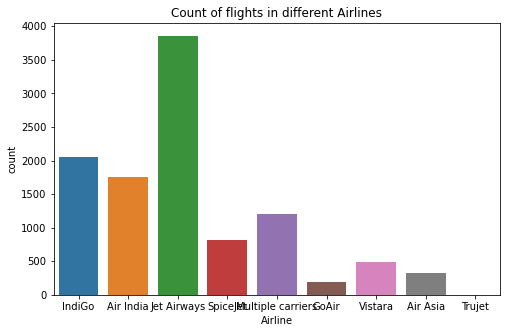

In [56]:
# Visualizing the various Airlines present in the dataset
plt.figure(figsize=(8,5))
sns.countplot(train_df["Airline"])
plt.title("Count of flights in different Airlines")
plt.show()

OBSERVATION

Jet airways has the highest counts.

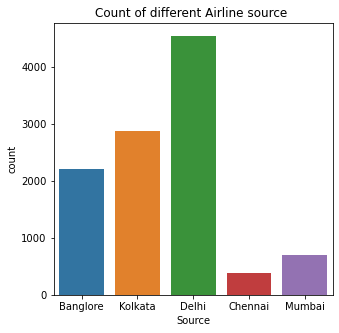

In [49]:
#visualizing the source from which place the service begins 
plt.figure(figsize=(5,5))
sns.countplot(train_df["Source"])
plt.title("Count of different Airline source ")
plt.show()

Max flights are starting from source Delhi.

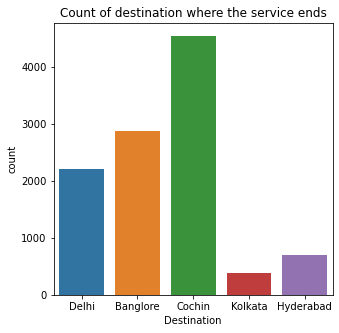

In [53]:
#visualizing the destination where the service ends 
plt.figure(figsize=(5,5))
sns.countplot(train_df["Destination"])
plt.title("Count of destination where the service ends")
plt.show()

Max flights are to destination Cochin.

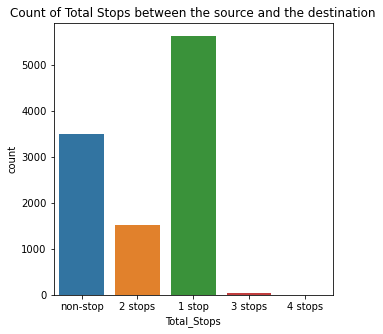

In [54]:
#visualizing the Total Stops between the source and the destination
plt.figure(figsize=(5,5))
sns.countplot(train_df["Total_Stops"])
plt.title("Count of Total Stops between the source and the destination")
plt.show()


Majority of the flights are with one stop, followed by non-stop flights.

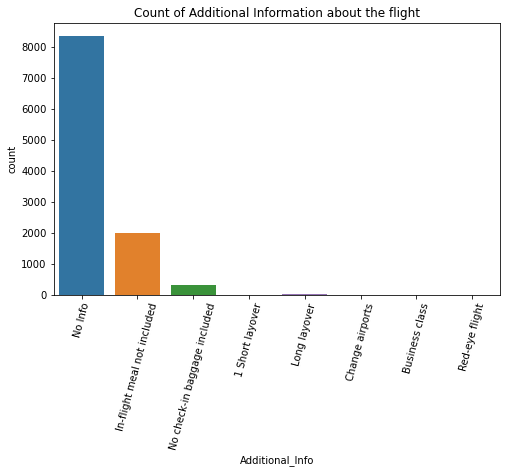

In [55]:
#visualizing the Additional Information about the flight
plt.figure(figsize=(8,5))
sns.countplot(train_df["Additional_Info"])
plt.title("Count of Additional Information about the flight")
plt.xticks(rotation=75)
plt.show()

We have multiple classes in the additional_info feature, with no_info with major counts followed by in flight meal and then in flight meal not included.

#### UNIVARIATE ANALYSIS (numerical column) 

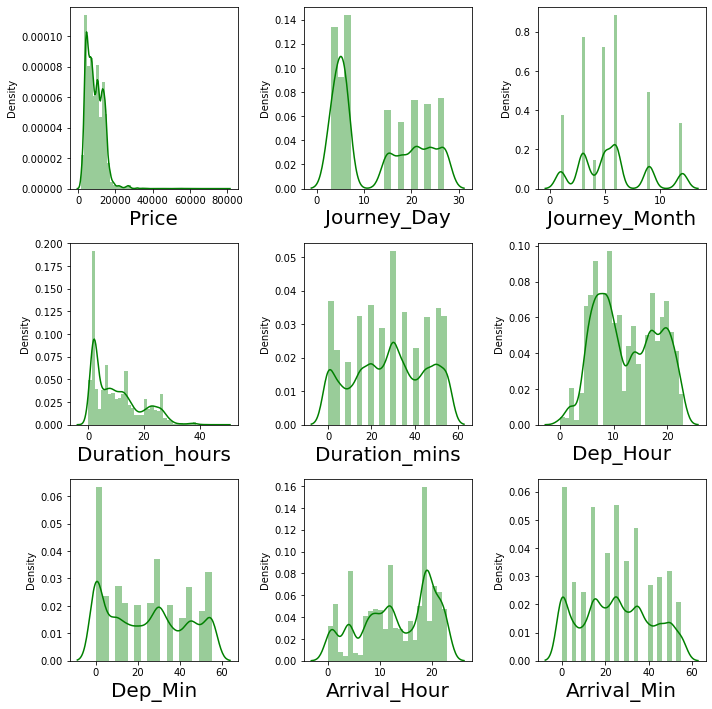

In [57]:
plt.figure(figsize=(10,10),facecolor='white')
plotnumber=1
for column in num_col:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(train_df[column],color="green")
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

OBSERVATION

We can see that the data is not normally distributed and some of the columns has skewness.

### BIVARIATE ANALYSIS 

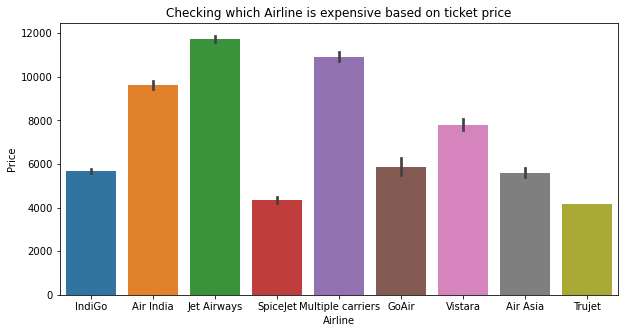

In [58]:
#checking which Airline is expensive based on Price of tickets

plt.figure(figsize=(10,5))
sns.barplot(train_df["Airline"],train_df["Price"],data=train_df)
plt.title("Checking which Airline is expensive based on ticket price")
plt.show()

Jet Airways is the most expensive and SpiceJet and Trujet are the cheapest.

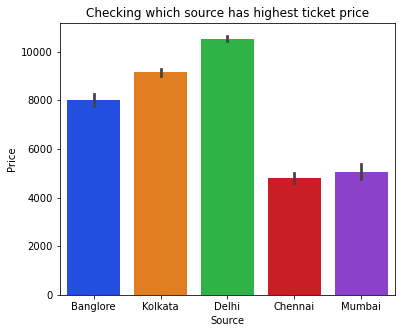

In [59]:
#checking the ticket prices in different sources

plt.figure(figsize=(6,5))
sns.barplot(train_df["Source"],train_df["Price"],data=train_df,palette="bright")
plt.title("Checking which source has highest ticket price")
plt.show()

The tickes prices are expensive in Delhi Source compared to others and price is cheaper in Chennai and Mumbai sources.

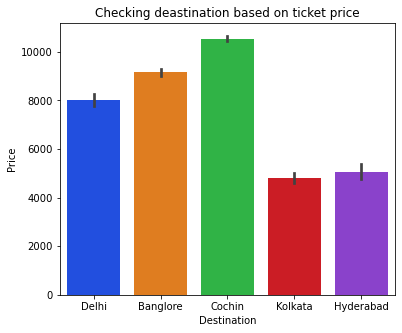

In [60]:
# checking how prices changes in each destination 

plt.figure(figsize=(6,5))
sns.barplot(train_df["Destination"],train_df["Price"],data=train_df,palette="bright" )
plt.title("Checking deastination based on ticket price")
plt.show()

The ticket price is highest in Cochin destination followed by Bangalore then Delhi.


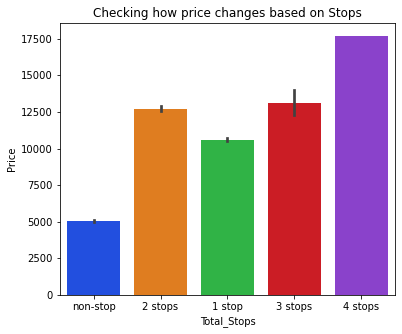

In [62]:
#checking the price vs total stops
plt.figure(figsize=(6,5))
sns.barplot(train_df["Total_Stops"],train_df["Price"],data=train_df,palette="bright")
plt.title("Checking how price changes based on Stops")
plt.show()

Flights with 4 stops have highest price followed by flights having 3 stops and the flights which have no stops is having very less ticket price compared to others.

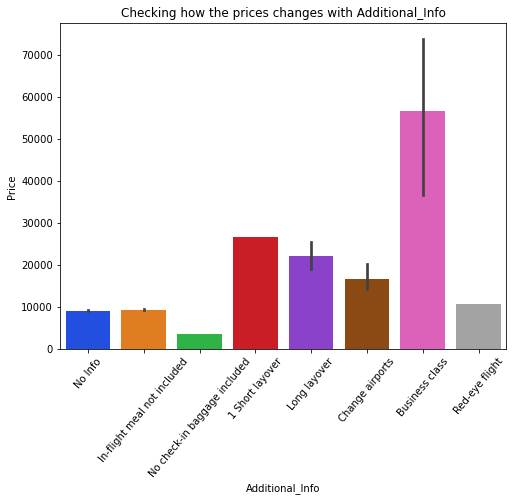

In [63]:
#comparing Additional_Info and Price of the flights
plt.figure(figsize=(8,6))
sns.barplot(train_df["Additional_Info"],train_df["Price"],data=train_df,palette="bright")
plt.title("Checking how the prices changes with Additional_Info")
plt.xticks(rotation=50)
plt.show()

Business class flights are more expensive compared to others and the flights having the class No check-in baggage included has very least ticket price.

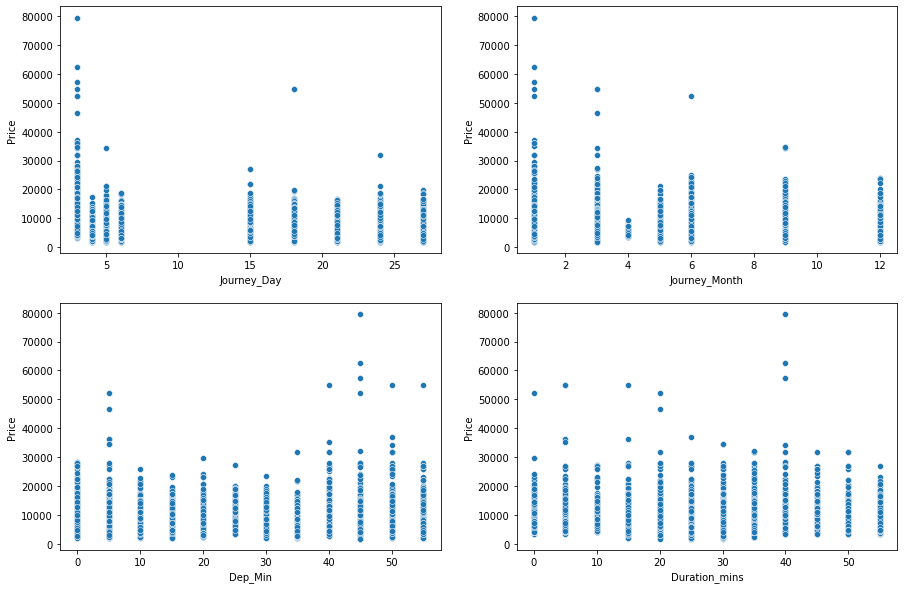

In [64]:
fig,axes=plt.subplots(2,2,figsize=(15,10))

#checking relation between Journey_Day and Price
sns.scatterplot(x='Journey_Day',y='Price',ax=axes[0,0],data=train_df)

#checking relation between Journey_Month and Price
sns.scatterplot(x='Journey_Month',y='Price',ax=axes[0,1],data=train_df)

#checking relation between Dep_Min and Price
sns.scatterplot(x='Dep_Min',y='Price',ax=axes[1,0],data=train_df)

#checking relation between Duration_mins and Price
sns.scatterplot(x='Duration_mins',y='Price',ax=axes[1,1],data=train_df)
plt.show()

### MULTIVARIANT ANALYSIS 

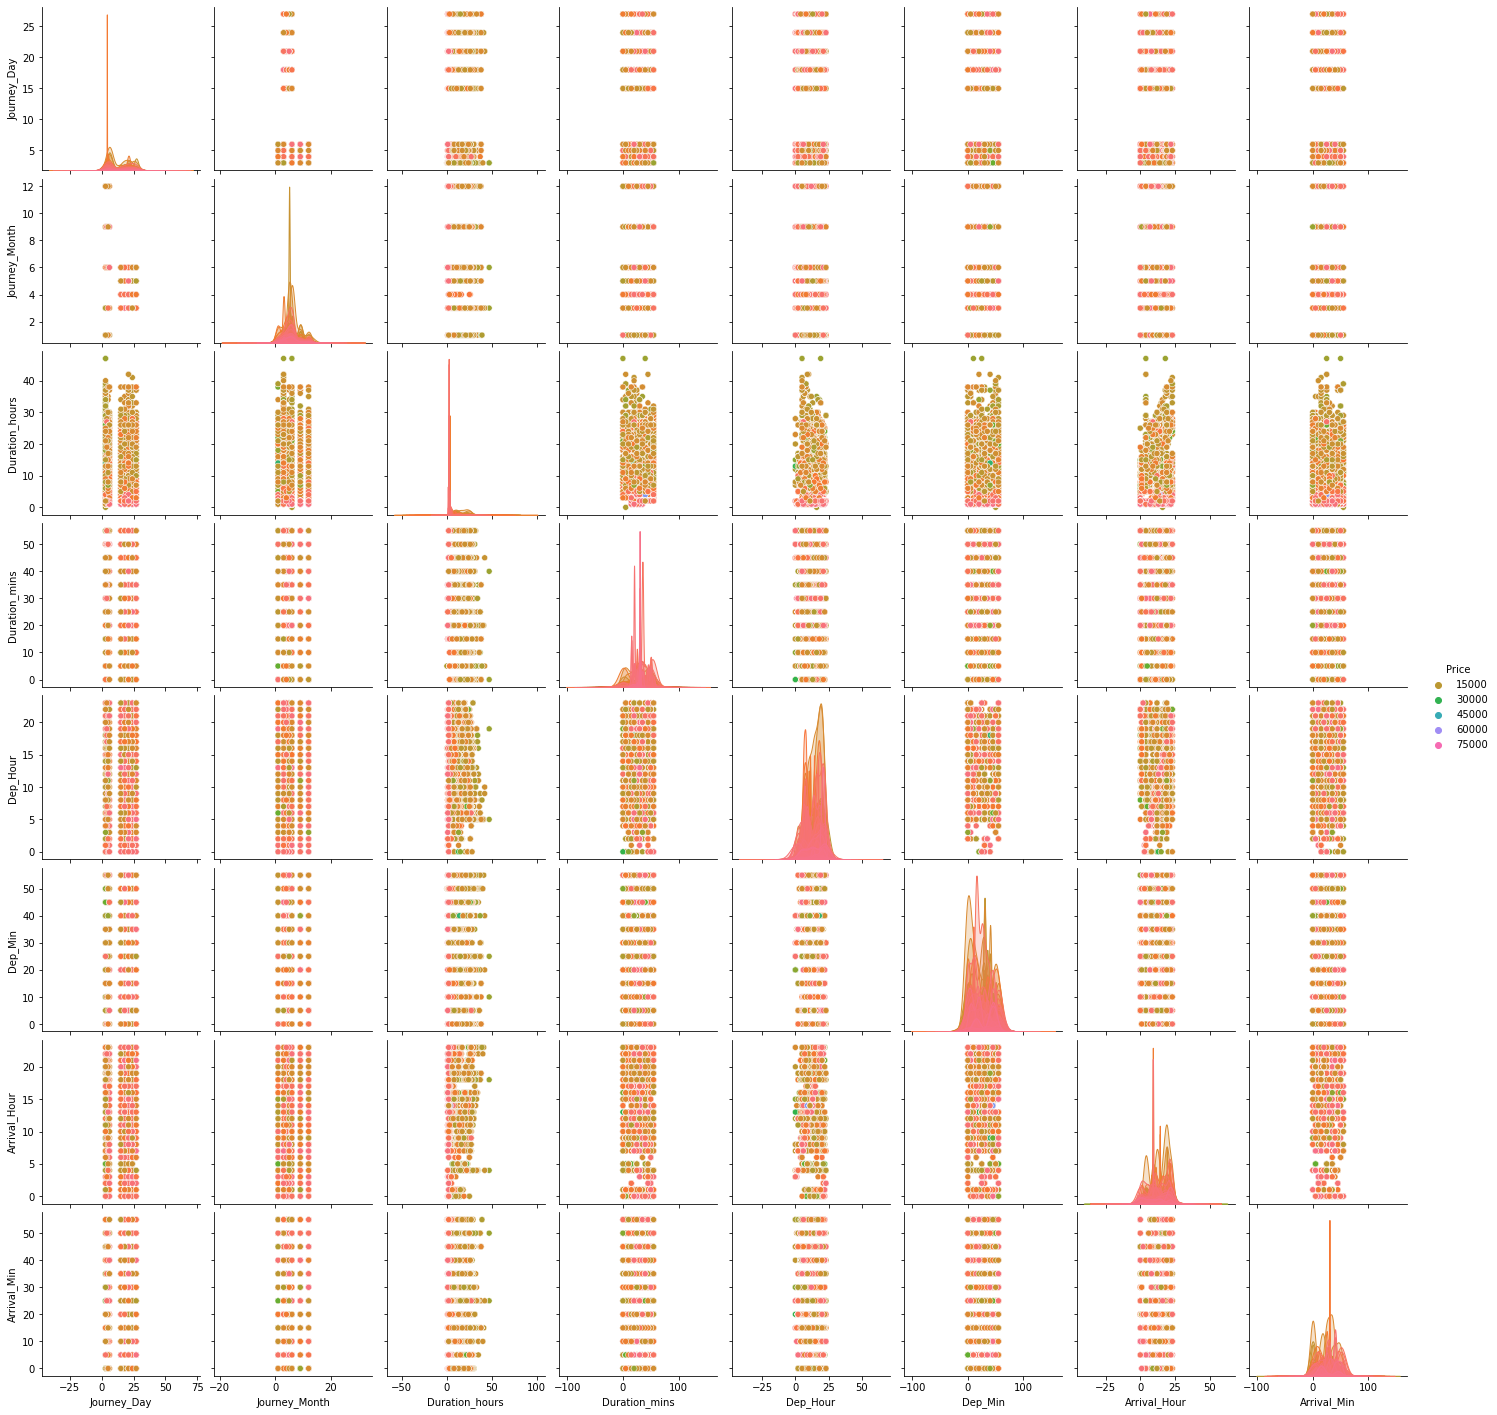

In [65]:
sns.pairplot(train_df,hue="Price",palette="husl")
plt.show()

## OUTLIERS 

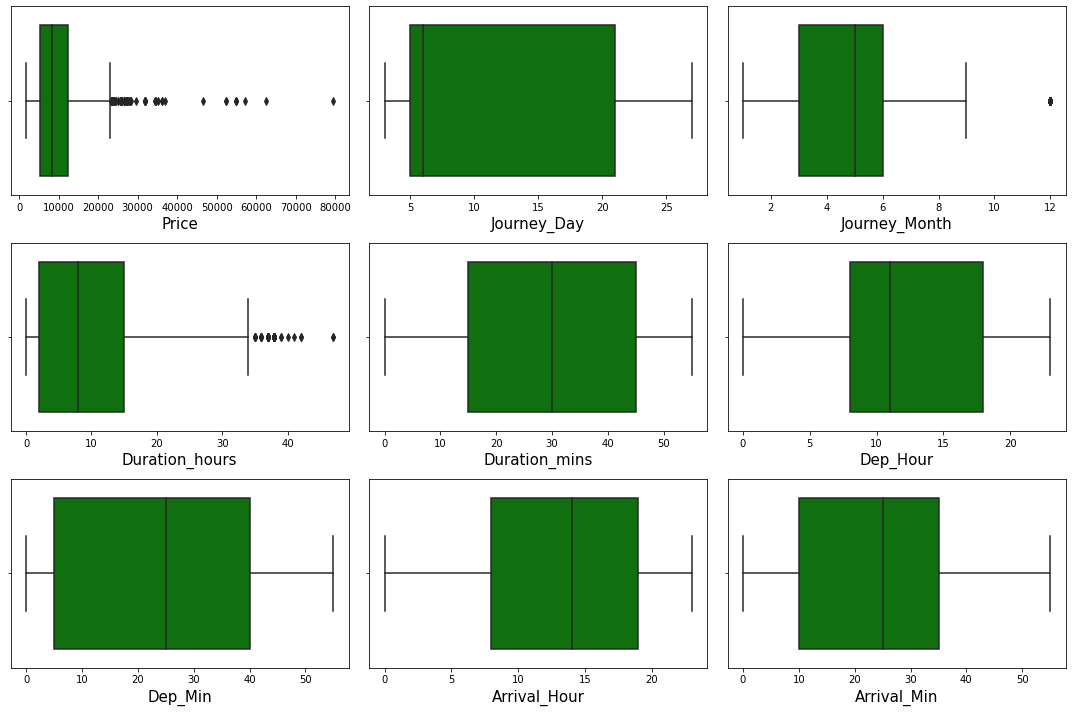

In [153]:
plt.figure(figsize=(15,10),facecolor='white')
plotnumber=1
for column in num_col:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(train_df[column],color="green")
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.tight_layout()

OBSERVATION

Outliers present in Price, Journey_Month and Duration_hours.Since Price is our target column so no need to remove outliers in this two columns.

### REMOVING OUTLIERS 

#### USING Z SCORE 

In [67]:
#features containing outliers
features = train_df[['Duration_hours','Journey_Month']]

In [68]:
#Using zscore to remove outliers
from scipy.stats import zscore
z=np.abs(zscore(features))
z

,Duration_hours,Journey_Month
0,0.970698,0.848503
1,0.382117,1.517993
2,1.030476,1.159966
3,0.617549,2.164201
4,0.735265,1.517993
...,...,...
10678,0.970698,1.159966
10679,0.970698,0.513758
10680,0.852981,0.513758
10681,0.970698,1.517993


In [69]:
# Creating new dataframe
new_df = train_df[(z<3).all(axis=1)] 
new_df

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Duration_hours,Duration_mins,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,IndiGo,Banglore,Delhi,BLR → DEL,non-stop,No Info,3897,24,3,2,50,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No Info,7662,5,1,7,25,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No Info,13882,6,9,19,0,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No Info,6218,5,12,5,25,18,5,23,30
4,IndiGo,Banglore,Delhi,BLR → NAG → DEL,1 stop,No Info,13302,3,1,4,45,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,non-stop,No Info,4107,4,9,2,30,19,55,22,25
10679,Air India,Kolkata,Banglore,CCU → BLR,non-stop,No Info,4145,27,4,2,35,20,45,23,20
10680,Jet Airways,Banglore,Delhi,BLR → DEL,non-stop,No Info,7229,27,4,3,0,8,20,11,20
10681,Vistara,Banglore,Delhi,BLR → DEL,non-stop,No Info,12648,3,1,2,40,11,30,14,10


In [70]:
# Shape of original dataset
train_df.shape

(10683, 15)

In [71]:
# Shape of new dataset
new_df.shape

(10617, 15)

#### LOSS PERCENTAGE 

In [72]:
loss_percent=(10683-10617)/10683*100
print(loss_percent,'%')


0.6178039876439202 %


OBSERVATION

0.61 % data loss is easily acceptable

new_df is the new data set after all the unnecessary columns and all the outliers apart from target columns (with z<3 z score) are removed

## SKEWNESS

In [73]:
new_df.skew().sort_values()

Arrival_Hour     -0.361250
Duration_mins    -0.097354
Dep_Hour          0.103798
Arrival_Min       0.107805
Dep_Min           0.164551
Journey_Day       0.367029
Journey_Month     0.628224
Duration_hours    0.761022
Price             1.824502
dtype: float64

OBSERVATION

Columns Price, Journey_Month and Duration_hours have skewness.

##### REMOVING SKEWNESS USING LOG TRANSFORMER 

In [74]:
new_df["Duration_hours"] = np.log1p(new_df["Duration_hours"])
new_df["Journey_Month"] = np.log1p(new_df["Journey_Month"])

In [75]:
#checking skewness after log transformation
new_df.skew().sort_values()

Journey_Month    -0.533689
Arrival_Hour     -0.361250
Duration_hours   -0.109197
Duration_mins    -0.097354
Dep_Hour          0.103798
Arrival_Min       0.107805
Dep_Min           0.164551
Journey_Day       0.367029
Price             1.824502
dtype: float64

OBSERVATION

Skewness has been removed in Duration_hours and Journey_Month columns. Let's visualize it.

## LABEL ENCODING 

In [76]:
LE=LabelEncoder()
new_df[cat_col]= new_df[cat_col].apply(LE.fit_transform)

In [77]:
new_df

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Duration_hours,Duration_mins,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,3,0,2,18,4,5,3897,24,1.386294,1.098612,50,22,20,1,10
1,1,3,0,84,1,5,7662,5,0.693147,2.079442,25,5,50,13,15
2,4,2,1,118,1,5,13882,6,2.302585,2.995732,0,9,25,4,25
3,3,3,0,91,0,5,6218,5,2.564949,1.791759,25,18,5,23,30
4,3,0,2,29,0,5,13302,3,0.693147,1.609438,45,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,64,4,5,4107,4,2.302585,1.098612,30,19,55,22,25
10679,1,3,0,64,4,5,4145,27,1.609438,1.098612,35,20,45,23,20
10680,4,0,2,18,4,5,7229,27,1.609438,1.386294,0,8,20,11,20
10681,8,0,2,18,4,5,12648,3,0.693147,1.098612,40,11,30,14,10


We have successfully encoded Ctegorial columns into Nummerical colums

## CORRELATION 

In [78]:
# Checking the correlation between features and the target
cor = new_df.corr()
cor

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Duration_hours,Duration_mins,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
Airline,1.000000,-0.013641,0.055391,0.021921,-0.010497,-0.056234,0.024773,0.025366,0.005402,-0.076407,-0.043858,-0.028238,-0.070340,-0.005868,-0.087465
Source,-0.013641,1.000000,-0.434677,0.404009,-0.225922,-0.034128,0.016718,0.007158,0.062011,0.149110,-0.145872,0.059469,-0.055929,0.026144,0.021640
Destination,0.055391,-0.434677,1.000000,-0.230755,0.510659,0.115602,-0.263334,0.007309,-0.061873,-0.493825,0.021895,-0.088810,0.097052,-0.058190,0.006954
Route,0.021921,0.404009,-0.230755,1.000000,-0.439372,0.002232,0.163635,0.096042,0.076196,0.383743,-0.229643,-0.070005,-0.066420,0.011514,-0.174071
Total_Stops,-0.010497,-0.225922,0.510659,-0.439372,1.000000,0.234493,-0.572413,0.043711,-0.048791,-0.806706,0.182696,0.038512,0.049105,-0.095213,0.176915
Additional_Info,-0.056234,-0.034128,0.115602,0.002232,0.234493,1.000000,-0.114590,-0.012301,-0.025319,-0.255705,0.059669,-0.052282,0.008984,-0.005902,0.044179
Price,0.024773,0.016718,-0.263334,0.163635,-0.572413,-0.114590,1.000000,-0.163765,-0.013511,0.605075,-0.122893,0.011430,-0.025585,0.021107,-0.088909
Journey_Day,0.025366,0.007158,0.007309,0.096042,0.043711,-0.012301,-0.163765,1.000000,-0.097582,-0.041874,-0.008671,-0.002628,-0.017421,-0.001501,-0.021901
Journey_Month,0.005402,0.062011,-0.061873,0.076196,-0.048791,-0.025319,-0.013511,-0.097582,1.000000,0.062242,-0.023684,0.020587,-0.005264,-0.005743,-0.031453
Duration_hours,-0.076407,0.149110,-0.493825,0.383743,-0.806706,-0.255705,0.605075,-0.041874,0.062242,1.000000,-0.166151,0.000980,-0.033117,0.060794,-0.127237


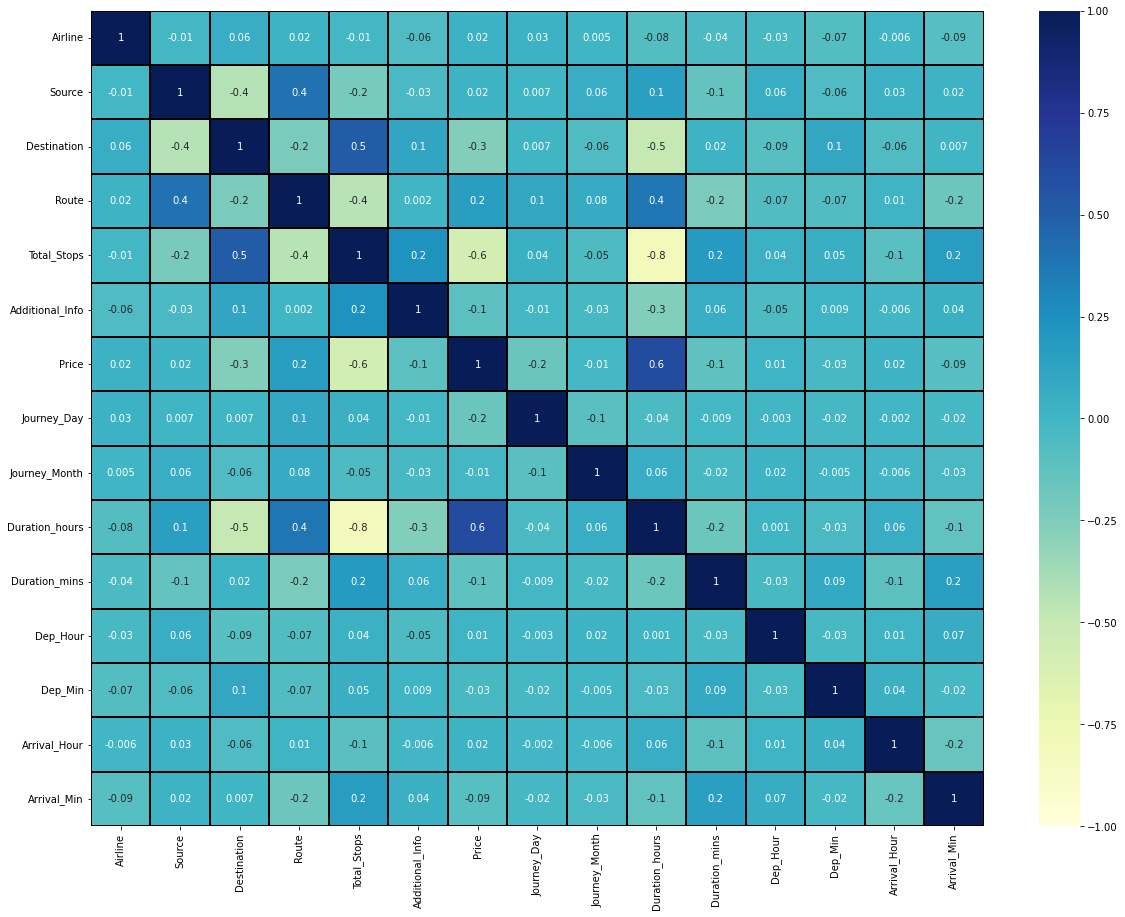

In [79]:
#correlation using heatmap
plt.figure(figsize=(20,15))    
sns.heatmap(new_df.corr(),linewidths=.1,vmin=-1, vmax=1,fmt='.1g',linecolor="black",annot=True,annot_kws={'size':10},cmap="YlGnBu")
plt.yticks(rotation=0);

In [80]:
cor['Price'].sort_values(ascending=False)

Price              1.000000
Duration_hours     0.605075
Route              0.163635
Airline            0.024773
Arrival_Hour       0.021107
Source             0.016718
Dep_Hour           0.011430
Journey_Month     -0.013511
Dep_Min           -0.025585
Arrival_Min       -0.088909
Additional_Info   -0.114590
Duration_mins     -0.122893
Journey_Day       -0.163765
Destination       -0.263334
Total_Stops       -0.572413
Name: Price, dtype: float64

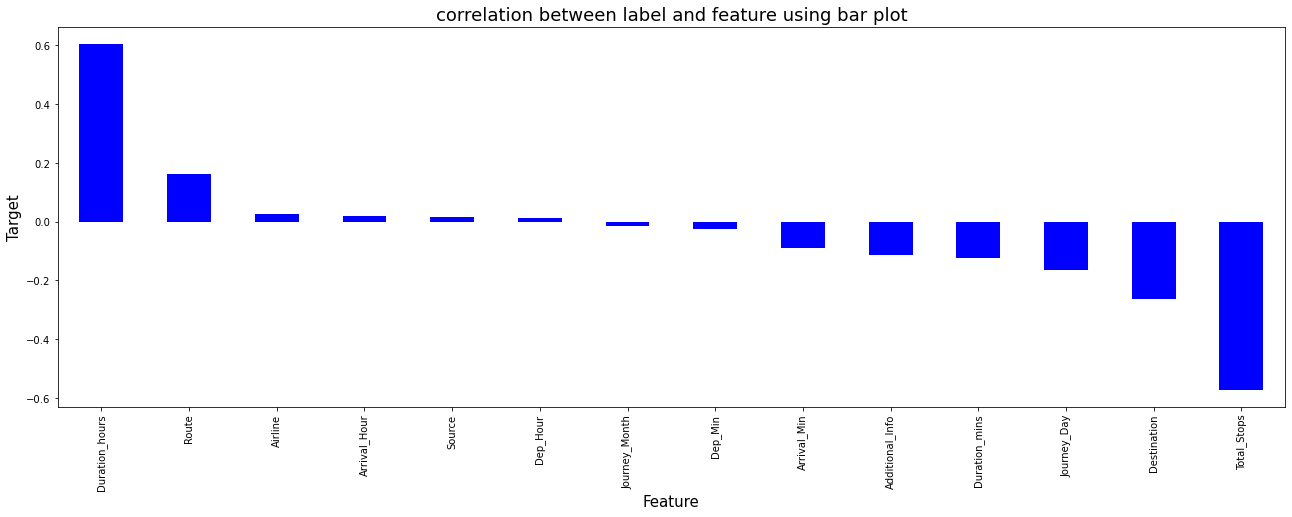

In [81]:
#correlation using barplot
plt.figure(figsize=(22,7))
new_df.corr()['Price'].sort_values(ascending=False).drop(['Price']).plot(kind='bar',color='b')
plt.xlabel('Feature',fontsize=15)
plt.ylabel('Target',fontsize=15)
plt.title('correlation between label and feature using bar plot',fontsize=18)
plt.show()

OBSERVATION

Duration_hours
Route ,             
Airline,
Arrival_Hour       
Source,Dep_Hour are positively correlated with Price


### STANDARD SCALING 

##### Splitting feature and label into x and y 

In [82]:
#Splitting feature and label into x and y
x = new_df.drop("Price", axis=1)
y = new_df["Price"]

##### Feature Scaling using Standard Scale 

In [83]:

scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Journey_Day,Journey_Month,Duration_hours,Duration_mins,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,-0.345488,-1.655042,0.812707,-1.544003,1.402360,0.424603,1.286176,-0.754967,-1.183984,1.274299,1.649475,-0.235894,-1.794784,-0.889208
1,-1.464134,0.888124,-1.157048,0.254498,-0.253797,0.424603,-0.873920,-2.141814,-0.009867,-0.201145,-1.312186,1.362715,-0.046050,-0.586465
2,0.213836,0.040402,-0.172170,1.180998,-0.253797,0.424603,-0.760231,1.078344,1.086993,-1.676590,-0.615325,0.030541,-1.357601,0.019019
3,-0.345488,0.888124,-1.157048,0.445248,-0.805850,0.424603,-0.873920,1.603281,-0.354241,-0.201145,0.952614,-1.035199,1.411228,0.321762
4,-0.345488,-1.655042,0.812707,-1.244253,-0.805850,0.424603,-1.101299,-2.141814,-0.572492,0.979210,0.604183,1.362715,1.119772,0.624504
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10612,-2.023458,0.888124,-1.157048,-0.290502,1.402360,0.424603,-0.987609,1.078344,-1.183984,0.093944,1.126829,1.629150,1.265500,0.019019
10613,-1.464134,0.888124,-1.157048,-0.290502,1.402360,0.424603,1.627244,-0.308502,-1.183984,0.389033,1.301044,1.096280,1.411228,-0.283723
10614,0.213836,-1.655042,0.812707,-1.544003,1.402360,0.424603,1.627244,-0.308502,-0.839609,-1.676590,-0.789540,-0.235894,-0.337506,-0.283723
10615,2.451129,-1.655042,0.812707,-1.544003,1.402360,0.424603,-1.101299,-2.141814,-1.183984,0.684121,-0.266894,0.296976,0.099677,-0.889208


##### MultiCollinearity with Variance Inflation Factor 

In [84]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

,VIF values,Features
0,1.044046,Airline
1,1.511995,Source
2,1.762240,Destination
3,1.583264,Route
4,3.330957,Total_Stops
5,1.107199,Additional_Info
6,1.035552,Journey_Day
7,1.022110,Journey_Month
8,3.175330,Duration_hours
9,1.125160,Duration_mins


OBSERVATION

 VIF value is less than 10 in all the columns. We are free from multicollinearity problem now so let's move to build our machine learning models

## MACHINE LEARNING 

##### Since the tatget column has continuous vsalues,we will use Linear Regression 

##  FINDING BEST RANDOM STATE

In [85]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

In [90]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20, random_state=i)
    mod = RandomForestRegressor()
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    acc=r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Maximum r2 score is ",maxAccu," on Random_state ",maxRS)

Maximum r2 score is  0.9291266477321749  on Random_state  186


### TRAIN TEST SPLIT 

In [91]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=186)


In [92]:
mod = RandomForestRegressor()

In [93]:
mod.fit(x_train,y_train)

RandomForestRegressor()

In [94]:
pred_test = mod.predict(x_test)

In [95]:
print(r2_score(y_test,pred_test))

0.9290235683894248


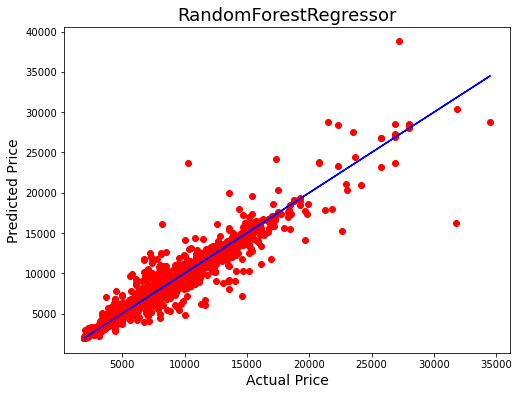

In [96]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=pred_test, color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual Price', fontsize=14)
plt.ylabel('Predicted Price', fontsize=14)
plt.title('RandomForestRegressor',fontsize=18)
plt.show()

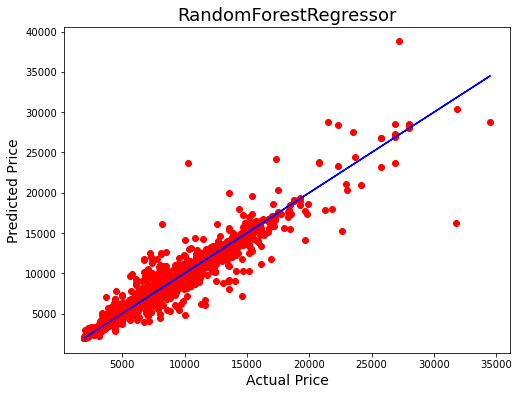

In [97]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=pred_test, color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual Price', fontsize=14)
plt.ylabel('Predicted Price', fontsize=14)
plt.title('RandomForestRegressor',fontsize=18)
plt.show()

In [98]:
# importing all the required libraries

from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [99]:
# creating a function to run all the regressors

def regressor(model, x, y):
    x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=186)
    
    # Training the model
    model.fit(x_train, y_train)
    
    # Predicting y_test
    pred = model.predict(x_test)
    
    # Root Mean Square Error (RMSE)
    rmse = mean_squared_error(y_test, pred, squared=False)
    print("Root Mean Square Error is:", rmse)
    
    # R2 score
    r2 = r2_score(y_test, pred, multioutput='variance_weighted')*100
    print("R2 Score is:", r2)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, x, y, cv=5).mean())*100
    print("Cross Validation Score is:", cv_score)
    
    # Result of r2 score - cv score
    result = r2 - cv_score
    print("R2 Score - Cross Validation Score is", result)

In [100]:
#Linear Regression
model=LinearRegression()
regressor(model, x, y)

Root Mean Square Error is: 3136.998928921124
R2 Score is: 49.63096635375918
Cross Validation Score is: 43.165585526907165
R2 Score - Cross Validation Score is 6.465380826852012


In [101]:
#L1 - Lasso Regression
model=Lasso(alpha=0.001)
regressor(model, x, y)

Root Mean Square Error is: 3136.9988716252083
R2 Score is: 49.63096819369596
Cross Validation Score is: 43.16558651274626
R2 Score - Cross Validation Score is 6.4653816809497044


In [102]:
#L2 -- Ridge Regression
model=Ridge(alpha=0.001)
regressor(model, x, y)

Root Mean Square Error is: 3136.9989305915037
R2 Score is: 49.63096630011849
Cross Validation Score is: 43.16558556746778
R2 Score - Cross Validation Score is 6.465380732650708


In [103]:
#Elastic Net
model=ElasticNet(alpha=0.001)
regressor(model, x, y)

Root Mean Square Error is: 3137.0063596260648
R2 Score is: 49.63072773214729
Cross Validation Score is: 43.165745857213125
R2 Score - Cross Validation Score is 6.464981874934168


In [104]:
#Support Vector Regression(RBF)
model=SVR(kernel='rbf')
regressor(model, x, y)

Root Mean Square Error is: 4310.721619954531
R2 Score is: 4.8881052877224445
Cross Validation Score is: 3.702000837936117
R2 Score - Cross Validation Score is 1.1861044497863276


In [105]:
#Support Vector Regression(LINEAR)
model=SVR(kernel='linear')
regressor(model, x, y)

Root Mean Square Error is: 3333.141679198713
R2 Score is: 43.13534265903204
Cross Validation Score is: 36.48888034999723
R2 Score - Cross Validation Score is 6.64646230903481


In [106]:
#Support Vector Regression(POLY)
model=SVR(kernel='poly')
regressor(model, x, y)

Root Mean Square Error is: 4297.177035182223
R2 Score is: 5.484862558187542
Cross Validation Score is: 3.9897843438588194
R2 Score - Cross Validation Score is 1.4950782143287227


In [107]:
#Decision Tree Regressor
model=DecisionTreeRegressor()
regressor(model, x, y)

Root Mean Square Error is: 1641.7653801128208
R2 Score is: 86.20387677113355
Cross Validation Score is: 78.32240066997501
R2 Score - Cross Validation Score is 7.88147610115854


In [108]:
#Random Forest Regressor
model=RandomForestRegressor(random_state=186)
regressor(model, x, y)

Root Mean Square Error is: 1180.5200722359793
R2 Score is: 92.86684552072407
Cross Validation Score is: 88.17914145700982
R2 Score - Cross Validation Score is 4.68770406371425


In [109]:
#K Neighbors Regressor
model=KNeighborsRegressor()
regressor(model, x, y)

Root Mean Square Error is: 2141.788257851118
R2 Score is: 76.52054864721592
Cross Validation Score is: 72.53697696458616
R2 Score - Cross Validation Score is 3.9835716826297585


In [110]:
#SGD Regressor
model=SGDRegressor()
regressor(model, x, y)

Root Mean Square Error is: 3143.5615732059186
R2 Score is: 49.42000051024799
Cross Validation Score is: 43.01706592052099
R2 Score - Cross Validation Score is 6.402934589726996


In [111]:
#Gradient Boosting Regressor
model=GradientBoostingRegressor()
regressor(model, x, y)

Root Mean Square Error is: 1706.247817795934
R2 Score is: 85.09887369662401
Cross Validation Score is: 80.88488736441401
R2 Score - Cross Validation Score is 4.213986332209998


In [112]:
#Ada Boost Regressor
model=AdaBoostRegressor()
regressor(model, x, y)

Root Mean Square Error is: 3699.1551601139395
R2 Score is: 29.960993969207948
Cross Validation Score is: 33.68166089894468
R2 Score - Cross Validation Score is -3.72066692973673


In [113]:
#Extra Trees Regressor
model=ExtraTreesRegressor()
regressor(model, x, y)

Root Mean Square Error is: 1158.1642326531705
R2 Score is: 93.13445251717553
Cross Validation Score is: 89.8946582960213
R2 Score - Cross Validation Score is 3.239794221154227


### HYPER PARAMETER TUNING 

In [114]:
ExtraTreesRegressor().get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [115]:
# creating parameters list to pass into GridSearchCV

parameters = {'criterion' : ['squared_error', 'absolute_error'],
              'max_features' : ['auto', 'sqrt', 'log2'],
              'n_jobs' : [-2, -1, 1],
              'random_state' : [None, 186]}

In [116]:
GCV = GridSearchCV(ExtraTreesRegressor(), parameters, cv=5)

In [118]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_jobs': [-2, -1, 1], 'random_state': [None, 186]})

In [119]:
GCV.best_params_ 

{'criterion': 'squared_error',
 'max_features': 'auto',
 'n_jobs': 1,
 'random_state': None}

##### FINAL MODEL 

In [120]:
final_model = ExtraTreesRegressor(criterion = 'squared_error', max_features = 'auto', n_jobs = -1, random_state = None)


In [121]:
final_fit = final_model.fit(x_train,y_train)   # final fit


In [122]:
final_pred = final_model.predict(x_test)   # predicting with best parameters


In [123]:
best_r2=r2_score(y_test,final_pred,multioutput='variance_weighted')*100   # checking final r2_score
print("R2 score for the Best Model is:", best_r2)

R2 score for the Best Model is: 92.75306783477248


In [124]:
final_cv_score = (cross_val_score(final_model, x, y, cv=8).mean())*100
print("Cross Validation Score is:", final_cv_score)

Cross Validation Score is: 89.40049688778986


In [125]:
final_rmse = mean_squared_error(y_test, final_pred, squared=False)
print("Root Mean Square Error is:", final_rmse)

Root Mean Square Error is: 1189.8977932208643


We used Hyper Parameter Tuning on the final model to obtained the best r2_score and CV score.

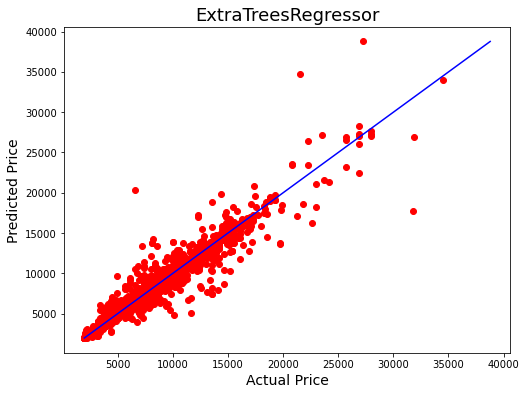

In [126]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=final_pred, color='r')
plt1 = max(max(final_pred), max(y_test))
plt2 = min(min(final_pred), min(y_test))
plt.plot([plt1, plt2], [plt1, plt2], 'b-')
plt.xlabel('Actual Price', fontsize=14)
plt.ylabel('Predicted Price', fontsize=14)
plt.title('ExtraTreesRegressor',fontsize=18)
plt.show()

Plotting the Final model Actual AveragePrice vs Predicted AveragePrice

#### SAVING MODEL IN PICKLE FORMAT 

In [127]:
# pickeling or serialization of a file
import pickle
filename = 'Flight_Price_Prediction_final_model.pkl'
pickle.dump(final_model, open(filename, 'wb'))

### PREDICTED COCLUSION 

In [128]:
import numpy as np
a=np.array(y_test)
predicted=np.array(final_model.predict(x_test))
df_comparison = pd.DataFrame({"original":a,"predicted":predicted},index= range(len(a)))
df_comparison

,original,predicted
0,5963,6834.64
1,7408,8716.72
2,9564,9564.00
3,6781,8225.13
4,3841,3841.32
...,...,...
2119,7452,7830.50
2120,10441,9600.50
2121,15129,15105.90
2122,4437,5797.27


# TEST DATA 

In [129]:
#importing the testing dataset
os.chdir("C:\GitBash\Files\Flight_Ticket_Participant_Datasets")
test_df = pd.read_excel('Test_set.xlsx')

In [130]:
test_df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


###### This test dataset has no target variable, we need to use our past data(trained data) to get the ticket price prediction. 

In [131]:
test_df.shape

(2671, 10)

In [132]:
test_df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info'],
      dtype='object')

In [133]:
test_df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
dtype: object

OBSERVATION

Test data set has 2671 rows and 10 columns.Columns are similar to test datset except the target column which is missing.

In [134]:
test_df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


In [135]:
# Predicting the flight price from the features of the testing data 
Predicted_Price = final_model.predict(test_df)
Predicted_Price

ValueError: could not convert string to float: 'Jet Airways'

we need to convert categorial  columns.check skewness snd check outliers and do standard scaling then find the predicted price for the test data set.

### DATA PROCESSING 

The columns Date_of_Journey, Dept_Time and Arrival_Time showing object data type so we have to convert this datatype into timestamp to use them properly for prediction.

In [136]:
# Converting Date and Time columns from object type to Date Type
test_df['Date_of_Journey']=pd.to_datetime(test_df['Date_of_Journey'])
test_df['Dep_Time']=pd.to_datetime(test_df['Dep_Time'])
test_df['Arrival_Time']=pd.to_datetime(test_df['Arrival_Time'])

In [137]:
# Extracting Day from Date_of_Journey column
test_df["Journey_Day"] = pd.to_datetime(test_df.Date_of_Journey, format="%d/%m/%Y").dt.day

# Extracting Month from Date_of_Journey column
test_df["Journey_Month"] = pd.to_datetime(test_df.Date_of_Journey, format="%d/%m/%Y").dt.month

# Dropping Date_of_Journey column
test_df.drop("Date_of_Journey",axis=1,inplace=True)

In [138]:
#checking the type of dataset now
test_df.dtypes

Airline                    object
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Journey_Day                 int64
Journey_Month               int64
dtype: object

In [139]:
# Converting duration column into list
duration=list(test_df["Duration"])

for i in range(len(duration)):
    
    # Checking if duration contains oly hour or minute
    if len(duration[i].split()) != 2:
        if 'h' in duration[i]:
            duration[i]=duration[i].strip()+' 0m'   
        else:
            duration[i]="0h "+ duration[i]
duration_hours=[]
duration_mins=[]
for i in range(len(duration)):
    
    # Extracting hours feom Duration
    duration_hours.append(int(duration[i].split(sep="h")[0]))
    
    # Extracting minutes from Duration
    duration_mins.append(int(duration[i].split(sep="m")[0].split()[-1]))

In [140]:
# Adding duration hours and duration mins to the data set
test_df["Duration_hours"] = duration_hours
test_df["Duration_mins"] = duration_mins

# Dropping Duration column
test_df.drop("Duration",axis=1,inplace=True)

In [141]:
# Departure time means the time when the journey starts from the source.

# Extracting Hours from Dep_Time column
test_df["Dep_Hour"] = pd.to_datetime(test_df["Dep_Time"]).dt.hour

# Extracting Minutes from Dep_Time column
test_df["Dep_Min"] = pd.to_datetime(test_df["Dep_Time"]).dt.minute

In [158]:
# Dropping Dep_Time column
test_df.drop("Dep_Time",axis=1,inplace=True)

In [159]:
# Arrival time is time of arrival at the destination.

# Extracting hour from Arrival_Time
test_df["Arrival_Hour"] = pd.to_datetime(test_df["Arrival_Time"]).dt.hour

# Extracting Minutes from Arrival_Time column
test_df["Arrival_Min"] = pd.to_datetime(test_df["Arrival_Time"]).dt.minute

# Dropping Arrival_Time column
test_df.drop("Arrival_Time",axis=1,inplace=True)

KeyError: 'Arrival_Time'

We have extracted values from the respective columns, let's check the data frame after feature engineering.

In [160]:
#checking dataset again
test_df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Journey_Day,Journey_Month,Duration_hours,Duration_mins,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,No Info,6,6,10,55,17,30,4,25
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,1 stop,No Info,5,12,4,0,6,20,10,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,In-flight meal not included,21,5,23,45,19,15,19,0
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,1 stop,No Info,21,5,13,0,8,0,21,0
4,Air Asia,Banglore,Delhi,BLR → DEL,non-stop,No Info,24,6,2,50,23,55,2,45


In [161]:
#checking the value counts of each columns
for i in test_df.columns:
        print(test_df[i].value_counts())

Jet Airways          899
IndiGo               511
Air India            440
Multiple carriers    350
SpiceJet             208
Vistara              131
Air Asia              86
GoAir                 46
Name: Airline, dtype: int64
Delhi       1145
Kolkata      710
Banglore     555
Mumbai       186
Chennai       75
Name: Source, dtype: int64
Cochin       1145
Banglore      710
Delhi         555
Hyderabad     186
Kolkata        75
Name: Destination, dtype: int64
DEL → BOM → COK                624
BLR → DEL                      389
CCU → BOM → BLR                253
CCU → BLR                      172
BOM → HYD                      164
                              ... 
BLR → BOM → IDR → GWL → DEL      1
BLR → GOI → DEL                  1
CCU → PAT → BLR                  1
BLR → VGA → DEL                  1
BOM → GOI → PNQ → HYD            1
Name: Route, Length: 100, dtype: int64
1 stop      1431
non-stop     849
2 stops      379
3 stops       11
4 stops        1
Name: Total_Stops, dtype: int

OBSERVATIONS

we can observe some repeated categories in some columns. Let's replace them.

In [162]:
# Replacing "Jet Airways Business" as "Jet Airways" in the column Airline
test_df["Airline"] = test_df["Airline"].replace("Jet Airways Business","Jet Airways")

# Replacing "Multiple carriers Premium economy" as "Multiple carriers" in Airline column
test_df["Airline"] = test_df["Airline"].replace("Multiple carriers Premium economy","Multiple carriers")

# Replacing "Vistara Premium economy" as "Vistara" in Airline column
test_df["Airline"] = test_df["Airline"].replace("Vistara Premium economy","Vistara")

# Replacing "New Delhi" as "Delhi" in Destination column
test_df["Destination"] = test_df["Destination"].replace("New Delhi","Delhi")

# In the column Additional Info, "No Info" and "No info" are one and the same so replace it by "No Info" 
test_df["Additional_Info"] = test_df["Additional_Info"].replace("No info","No Info")

# Replacing "1 Long layover" and "2 Long layover" as "Long layover"in the column Additional Info
test_df["Additional_Info"] = test_df["Additional_Info"].replace(["1 Long layover","2 Long layover"],"Long layover")


In [163]:
val_count = ["Airline","Destination", "Additional_Info"]

for i in val_count:
    print(test_df[i].value_counts())

Jet Airways          899
IndiGo               511
Air India            440
Multiple carriers    350
SpiceJet             208
Vistara              131
Air Asia              86
GoAir                 46
Name: Airline, dtype: int64
Cochin       1145
Banglore      710
Delhi         555
Hyderabad     186
Kolkata        75
Name: Destination, dtype: int64
No Info                         2148
In-flight meal not included      444
No check-in baggage included      76
Long layover                       1
Business class                     1
Change airports                    1
Name: Additional_Info, dtype: int64


In [164]:
#Checking number of unique values in each column
test_df.nunique()

Airline              8
Source               5
Destination          5
Route              100
Total_Stops          5
Additional_Info      6
Journey_Day          9
Journey_Month        7
Duration_hours      41
Duration_mins       12
Dep_Hour            24
Dep_Min             12
Arrival_Hour        24
Arrival_Min         12
dtype: int64

In [165]:
#Checking null values in the dataframe
test_df.isnull().sum()

Airline            0
Source             0
Destination        0
Route              0
Total_Stops        0
Additional_Info    0
Journey_Day        0
Journey_Month      0
Duration_hours     0
Duration_mins      0
Dep_Hour           0
Dep_Min            0
Arrival_Hour       0
Arrival_Min        0
dtype: int64

NO MISSING VALUES ARE PRESENT IN THE DATASET.


## STATISTICAL VIEW 

In [166]:
test_df.describe()

,Journey_Day,Journey_Month,Duration_hours,Duration_mins,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
count,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000
mean,12.026956,5.607263,10.189068,28.397604,12.603519,24.891426,13.585174,24.558218
std,8.564408,3.042952,8.390683,16.747651,5.686673,19.086522,7.040396,16.775436
min,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,3.000000,2.000000,15.000000,8.000000,5.000000,8.000000,10.000000
50%,6.000000,5.000000,8.000000,30.000000,12.000000,25.000000,15.000000,25.000000
75%,21.000000,6.000000,15.000000,45.000000,18.000000,45.000000,19.000000,35.000000
max,27.000000,12.000000,40.000000,55.000000,23.000000,55.000000,23.000000,55.000000


In [167]:
#checking for categorical columns
categorical_col=[]
for i in test_df.dtypes.index:
    if test_df.dtypes[i]=='object':
        categorical_col.append(i)
print(categorical_col)

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']


In [168]:
#checking for numerical columns
numerical_col=[]
for i in test_df.dtypes.index:
    if test_df.dtypes[i]!='object':
        numerical_col.append(i)
print(numerical_col)

['Journey_Day', 'Journey_Month', 'Duration_hours', 'Duration_mins', 'Dep_Hour', 'Dep_Min', 'Arrival_Hour', 'Arrival_Min']


## OUTLIERS 

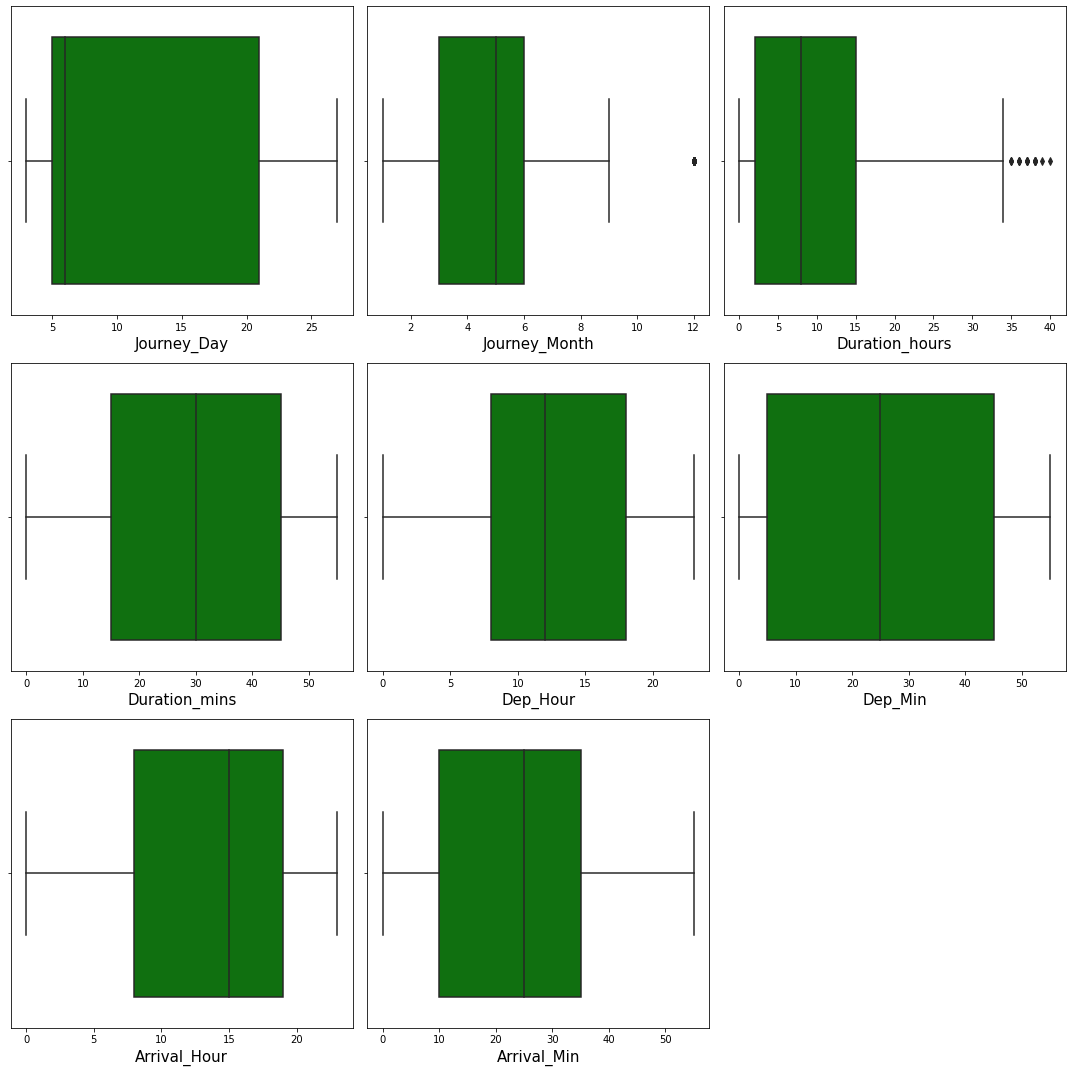

In [169]:
plt.figure(figsize=(15,15),facecolor='white')
plotnumber=1
for column in numerical_col:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(test_df[column],color="green")
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.tight_layout()

We can see outliers present in Duration_hours and Journey_MONTH.Lets remove it using z score

### REMOVING OUTLIERS 

In [170]:
#features containing outliers
feature = test_df[['Duration_hours','Journey_Month']]

In [172]:
#Using zscore to remove outliers
from scipy.stats import zscore
z=np.abs(zscore(feature))
z

,Duration_hours,Journey_Month
0,0.022537,0.129089
1,0.737750,2.101227
2,1.527090,0.199601
3,0.335069,0.199601
4,0.976154,0.129089
...,...,...
2666,1.527090,0.129089
2667,0.976154,0.856981
2668,0.499346,0.129089
2669,0.573473,0.129089


In [173]:
#creating new dataframe
new_test_df = test_df[(z<3).all(axis=1)] 
new_test_df

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Journey_Day,Journey_Month,Duration_hours,Duration_mins,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,No Info,6,6,10,55,17,30,4,25
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,1 stop,No Info,5,12,4,0,6,20,10,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,In-flight meal not included,21,5,23,45,19,15,19,0
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,1 stop,No Info,21,5,13,0,8,0,21,0
4,Air Asia,Banglore,Delhi,BLR → DEL,non-stop,No Info,24,6,2,50,23,55,2,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,CCU → DEL → BLR,1 stop,No Info,6,6,23,55,20,30,20,25
2667,IndiGo,Kolkata,Banglore,CCU → BLR,non-stop,No Info,27,3,2,35,14,20,16,55
2668,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,No Info,3,6,6,35,21,50,4,25
2669,Air India,Delhi,Cochin,DEL → BOM → COK,1 stop,No Info,3,6,15,15,4,0,19,15


In [175]:
#shape of original test dataset
test_df.shape

(2671, 14)

In [176]:
#shape of newl test dataset
new_test_df.shape

(2653, 14)

In [177]:
loss_percent=(2671-2653)/2671*100
print(loss_percent,'%')


0.6739049045301385 %


OBSERVATION

0.67 % data loss is easily acceptable

new_df is the new data set after all the unnecessary columns and all the outliers apart from target columns (with z<3 z score) are removed.

## SKEWNESS 

In [178]:
new_test_df.skew().sort_values()

Arrival_Hour     -0.432551
Duration_mins    -0.110629
Dep_Hour          0.083357
Arrival_Min       0.110111
Dep_Min           0.132681
Journey_Day       0.475210
Journey_Month     0.591565
Duration_hours    0.795392
dtype: float64

##### REMOVING SKEWNESS USING LOG TRANSFORMER 

In [179]:
new_test_df["Duration_hours"] = np.log1p(new_test_df["Duration_hours"])
new_test_df["Journey_Month"] = np.log1p(new_test_df["Journey_Month"])


In [180]:
#checking skewness after using log transform
new_test_df.skew().sort_values()

Journey_Month    -0.541053
Arrival_Hour     -0.432551
Duration_hours   -0.134743
Duration_mins    -0.110629
Dep_Hour          0.083357
Arrival_Min       0.110111
Dep_Min           0.132681
Journey_Day       0.475210
dtype: float64

### LABEL ENCODING

In [181]:
le=LabelEncoder()
new_test_df[categorical_col]= new_test_df[categorical_col].apply(le.fit_transform)
new_test_df

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Journey_Day,Journey_Month,Duration_hours,Duration_mins,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,4,2,1,76,0,4,6,1.945910,2.397895,55,17,30,4,25
1,3,3,0,65,0,4,5,2.564949,1.609438,0,6,20,10,20
2,4,2,1,76,0,2,21,1.791759,3.178054,45,19,15,19,0
3,5,2,1,76,0,4,21,1.791759,2.639057,0,8,0,21,0
4,0,0,2,16,4,4,24,1.945910,1.098612,50,23,55,2,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,1,3,0,51,0,4,6,1.945910,3.178054,55,20,30,20,25
2667,3,3,0,43,4,4,27,1.386294,1.098612,35,14,20,16,55
2668,4,2,1,76,0,4,3,1.945910,1.945910,35,21,50,4,25
2669,1,2,1,76,0,4,3,1.945910,2.772589,15,4,0,19,15


### STANDARD SCALING 

In [182]:
scaler = StandardScaler()
new_test_df = pd.DataFrame(scaler.fit_transform(new_test_df), columns=new_test_df.columns)
new_test_df

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Journey_Day,Journey_Month,Duration_hours,Duration_mins,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,0.233214,0.031440,-0.167242,0.804966,-0.791072,0.393727,-0.706193,0.344970,0.374141,1.583185,0.766320,0.272445,-1.354818,0.025591
1,-0.348833,0.873978,-1.175634,0.398570,-0.791072,0.393727,-0.823069,1.565339,-0.579376,-1.697747,-1.172433,-0.252462,-0.503215,-0.272182
2,0.233214,0.031440,-0.167242,0.804966,-0.791072,-2.166466,1.046954,0.041078,1.317622,0.986652,1.118821,-0.514916,0.774190,-1.463273
3,0.815260,0.031440,-0.167242,0.804966,-0.791072,0.393727,1.046954,0.041078,0.665790,-1.697747,-0.819933,-1.302277,1.058057,-1.463273
4,-2.094973,-1.653635,0.841150,-1.411740,1.429790,0.393727,1.397583,0.344970,-1.197140,1.284918,1.823822,1.584714,-1.638686,1.216682
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2648,-1.512927,0.873978,-1.175634,-0.118662,-0.791072,0.393727,-0.706193,0.344970,1.317622,1.583185,1.295071,0.272445,0.916123,0.025591
2649,-0.348833,0.873978,-1.175634,-0.414222,1.429790,0.393727,1.748212,-0.758252,-1.197140,0.390119,0.237569,-0.252462,0.348388,1.812227
2650,0.233214,0.031440,-0.167242,0.804966,-0.791072,0.393727,-1.056822,0.344970,-0.172465,0.390119,1.471321,1.322260,-1.354818,0.025591
2651,-1.512927,0.031440,-0.167242,0.804966,-0.791072,0.393727,-1.056822,0.344970,0.827275,-0.802948,-1.524934,-1.302277,0.774190,-0.569955


Data set is ready to get predicted Price from the final predicted training model.

## PREDICTED  PRICE 

In [183]:
#Predicting the flight price from the features of the testing data 
Predicted_Price = final_model.predict(new_test_df)
Predicted_Price

array([14479.32,  4358.73, 12652.41, ..., 14717.45, 10573.78,  8031.58])

### SAVING PREDICTED PRICE 

In [184]:
Prediction = pd.DataFrame()
Prediction['Price']= Predicted_Price
Prediction

,Price
0,14479.320
1,4358.730
2,12652.410
3,11968.930
4,3919.490
...,...
2648,9875.500
2649,5250.655
2650,14717.450
2651,10573.780


In [185]:
#saving Predicted price for test dat
Prediction.to_csv("Flight_Price_Test_Data_Predicted_Price.csv", index=False)


# FINAL CONCLUSION

Extra Tree Regressor is found to be the best model for training dataset to predict the price.

We have used the final model from Train dataset to predict the target column 'PRICE' for test dataset.

..............................,...........................................................................THANK YOU........................................................................................................